# Applied Econometrics (Part 4)
## Lviv Data Science Summer School

### Jozef Barunik & Luboš Hanus

**July 2019**

## Density / distribution / probability forecasts


- Point forecasts and uncertainty of this information

- How do we specify the certainty?

- In contrast to single value forecast, probabilistic forecasts assign a probability to each of a number of different outcomes.

- Traditionally point forecasts: first two moments

<br><br><br>


What is the distribution?

In [1]:
options(repr.plot.width=7, repr.plot.height=4)
## Normal distribution
x <- rnorm(100000, 0, 1)
x <- (x - mean(x))/sd(x) ## z-score

In [2]:
emp_q = as.numeric(quantile(x, probs = c(0.02775, 0.159, 0.5, 0.841, 0.97725)))
emp_q

[1] -1.915634614 -0.995356622  0.001043329  0.992504040  1.998480896

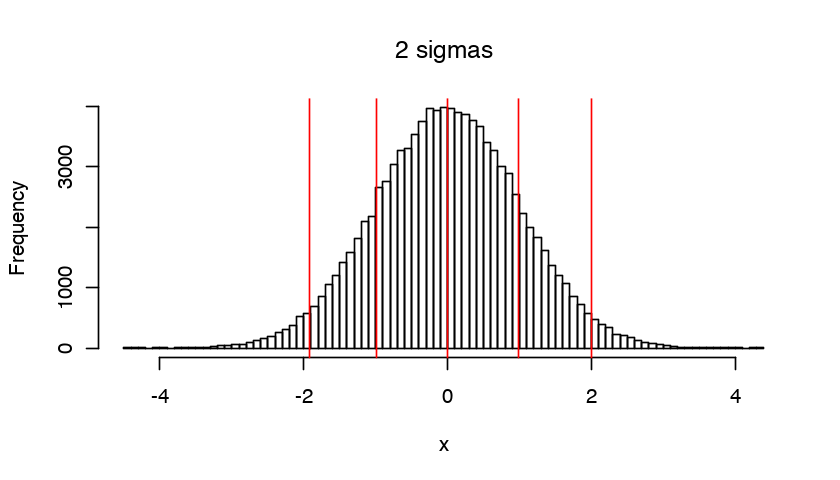

In [3]:
hist(x, breaks = 100, main="2 sigmas") ## normally 3 :)
abline(v = emp_q, col="red")

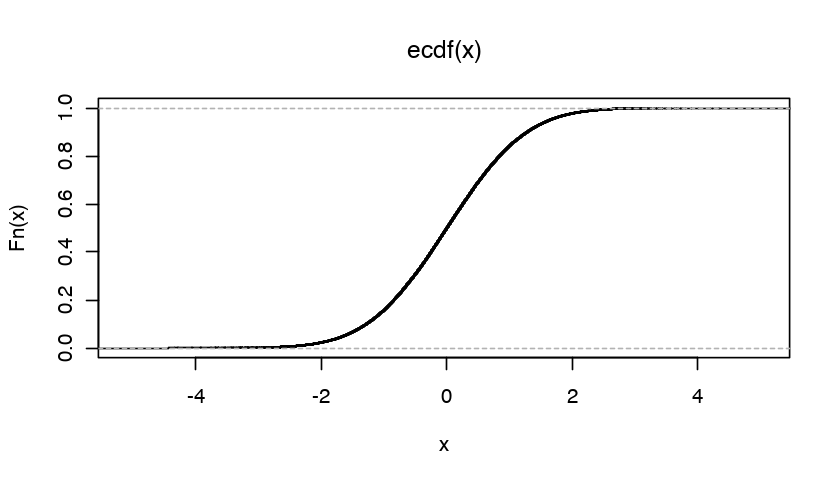

In [4]:
plot(ecdf(x)) # empirical cumulative distribution function

## Can we model the distribution ?

- cumulative distribution is similar to sigmoid function

Sigmoid

$$ F(x) = \frac{1}{1+\exp(-x)}$$


In [5]:
fx = function(x) {    
    1/(1+exp(-x))
}

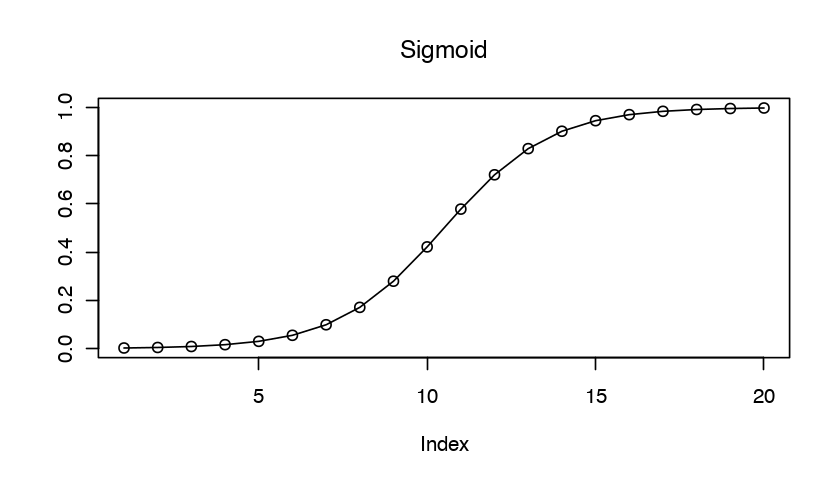

In [6]:
plot(fx(seq(-6, 6, length.out=20)), type="o", ylab="", main="Sigmoid")

### Modeling probability

$$ F(y|x) = \Pr(Y \leq y| X = x) $$

Logistic regression

$$\Pr(Y \leq y | X = x) = \frac{\exp(x)}{1 + \exp(x)}$$

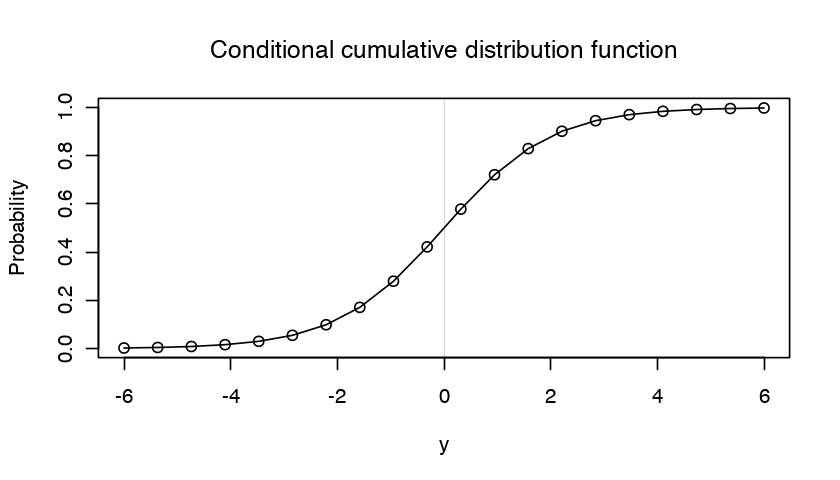

In [7]:
y = seq(-6, 6, length.out=20)
pr = exp(y)/(1 + exp(y))
plot(y, pr, type="o", main="Conditional cumulative distribution function", ylab="Probability")
abline(v=0, lwd=0.1)

## Logistic regression

Theory:

In the linear regression we have 
$$ y^{(i)}=β_0+β_1x^{(i)}_1 + … + β_p x^{(i)}_p $$

To get the probabilities between 0 and 1, we wrap it with the sigmoid/logistic function

$$ P(y^{(i)} = 1) = \frac{1}{1+\exp(- (β_0+β_1x^{(i)}_1 + … + β_p x^{(i)}_p ))}$$

And the log-odds we have
$$\log\left(\frac{ P( y = 1 )}{ 1 − P ( y = 1 )} \right ) = \log \left( \frac{P ( y = 1 )}{ P ( y = 0 )} \right) = β_0 + β_1 x_1 + … + β_p x_p $$  

- it calculates probability of each observation in data set
- the coefficients from logistic regression tell us how much that particular variables contribute to the log odds.

Pros:

- easy classification model
    - simplicity close to OLS
- gives probabilities


Cons:

- not easy interpretation (multiplicative weights) -> marginal effects
- complete separation - if a feature completely separates the two classes logit cannot be trained (convergence)

## Excercise:

A traditional data set from UCLA which has 4 variable called admit, GRE score, GPA and rank of their undergrad school.

In [8]:
df1 <- read.csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
head(df1)

admit,gre,gpa,rank
0,380,3.61,3
1,660,3.67,3
1,800,4.00,1
1,640,3.19,4
0,520,2.93,4
1,760,3.00,2


In [9]:
df1$rank <- as.factor(df1$rank)
# head(df)

fit1 <- glm(admit ~ gre + gpa + rank, data = df1, family = binomial)
summary(fit1)


Call:
glm(formula = admit ~ gre + gpa + rank, family = binomial, data = df1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6268  -0.8662  -0.6388   1.1490   2.0790  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.989979   1.139951  -3.500 0.000465 ***
gre          0.002264   0.001094   2.070 0.038465 *  
gpa          0.804038   0.331819   2.423 0.015388 *  
rank2       -0.675443   0.316490  -2.134 0.032829 *  
rank3       -1.340204   0.345306  -3.881 0.000104 ***
rank4       -1.551464   0.417832  -3.713 0.000205 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 499.98  on 399  degrees of freedom
Residual deviance: 458.52  on 394  degrees of freedom
AIC: 470.52

Number of Fisher Scoring iterations: 4


In [10]:
test <- data.frame(gre = 500, gpa = 3.1, rank = as.factor(1))
pred <- predict(fit1, df1, type="respons")

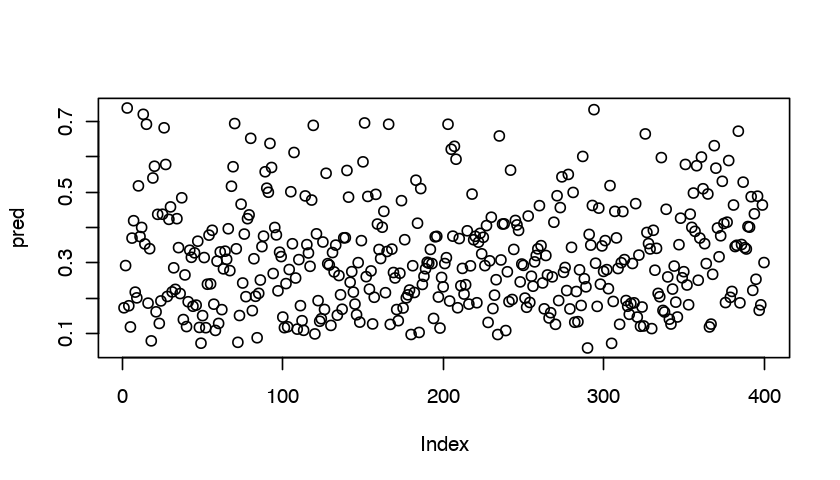

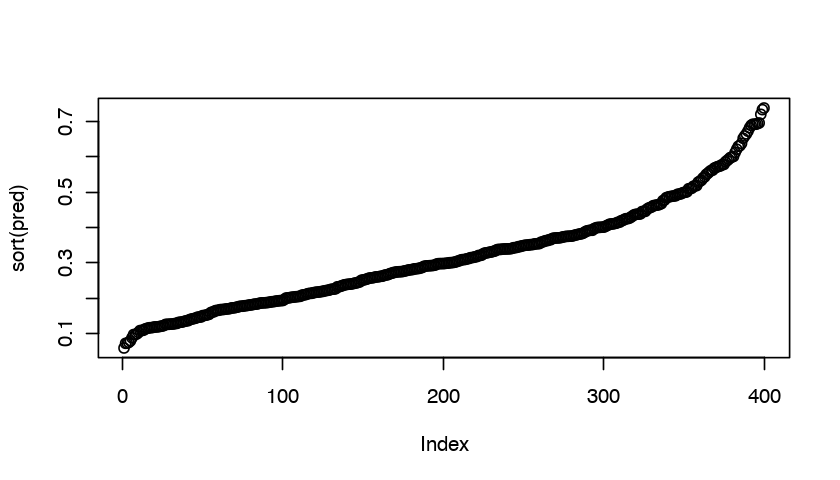

In [11]:
## Exercise: plot probability
plot(pred)
plot(sort(pred)) ## create axis X correctly

## Exercise: plot probability